In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
sTicker_lis =  ['3443','2388', '2498', '2610', '1319', '3035', '3006', '2615', '5425', '3105']
def dff(ticker):  
    a = pd.read_csv(ticker + '.csv')
    del a['Unnamed: 0']
    a = a[['return', 'time']]
    a.set_index('time', inplace = True)
    a.rename(columns={'return': ticker},inplace = True)
    return a

In [3]:
for i in range(len(sTicker_lis)):
    df = dff(sTicker_lis[i])
    if i == 0:
        total_df = df
    else:
        total_df = pd.merge(total_df, df, left_index=True, right_index=True, how='outer').fillna(method = 'ffill')


In [4]:
total_df.index = pd.to_datetime(total_df.index).strftime('%H:%M')

In [5]:
total_df.describe()

,3443,2388,2498,2610,1319,3035,3006,2615,5425,3105
count,160628.000000,160628.000000,160628.000000,160628.000000,160628.000000,160628.000000,160628.000000,160628.000000,160628.000000,160628.000000
mean,0.003709,0.003075,0.003834,-0.007388,0.003210,-0.001034,0.001147,0.010558,-0.004407,-0.027247
std,0.003972,0.005121,0.003052,0.004657,0.002278,0.005966,0.001764,0.005560,0.002515,0.015914
min,-0.006750,-0.006960,-0.002310,-0.016112,-0.002380,-0.021150,-0.002375,-0.002145,-0.009390,-0.059350
25%,0.001500,-0.002000,0.001190,-0.010472,0.001180,-0.002350,0.000145,0.006115,-0.006840,-0.040650
50%,0.002000,0.004200,0.003815,-0.008592,0.003090,0.000000,0.001000,0.011095,-0.004290,-0.030975
75%,0.006250,0.007920,0.006440,-0.002952,0.005000,0.002350,0.001870,0.012805,-0.002250,-0.011050
max,0.015750,0.012880,0.009940,0.004568,0.008820,0.016450,0.006140,0.030235,0.000300,0.002625


<AxesSubplot:xlabel='time'>

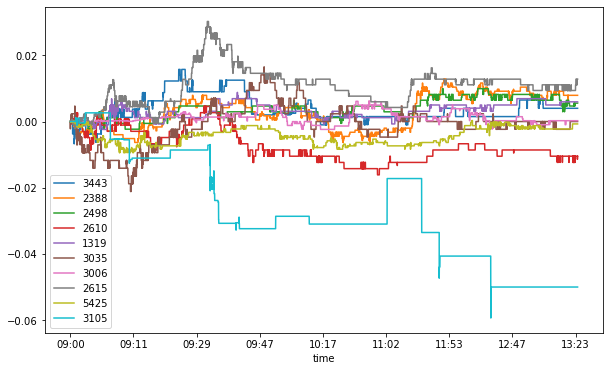

In [6]:
total_df.plot(figsize=(10, 6))